# import libraries

In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Problem Statments : 

#### Pridict weight of fish using following feature :
    
1.Species

2.Length1

3.Length2

4.Length3

5.Height

6.Width    

### Data Gathering

In [12]:
FILE_PATH = r'CSV_files\Fish.csv'

In [13]:
fish_df = pd.read_csv(FILE_PATH)
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### EDA 

In [14]:
fish_df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [15]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### 1.Species

In [16]:
# We use here  Label encoding 

In [17]:
fish_df['Species'].value_counts().to_dict()

{'Perch': 56,
 'Bream': 35,
 'Roach': 20,
 'Pike': 17,
 'Smelt': 14,
 'Parkki': 11,
 'Whitefish': 6}

In [18]:
fish_df['Species'].replace({'Perch': 1,
 'Bream': 2,
 'Roach': 3,
 'Pike': 4,
 'Smelt': 5,
 'Parkki': 6,
 'Whitefish': 7},inplace= True)

In [19]:
fish_df['Species'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 159 entries, 0 to 158
Series name: Species
Non-Null Count  Dtype
--------------  -----
159 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


### 2.Length1

In [20]:
fish_df['Length1']

0      23.2
1      24.0
2      23.9
3      26.3
4      26.5
       ... 
154    11.5
155    11.7
156    12.1
157    13.2
158    13.8
Name: Length1, Length: 159, dtype: float64

<AxesSubplot: xlabel='Length1', ylabel='Density'>

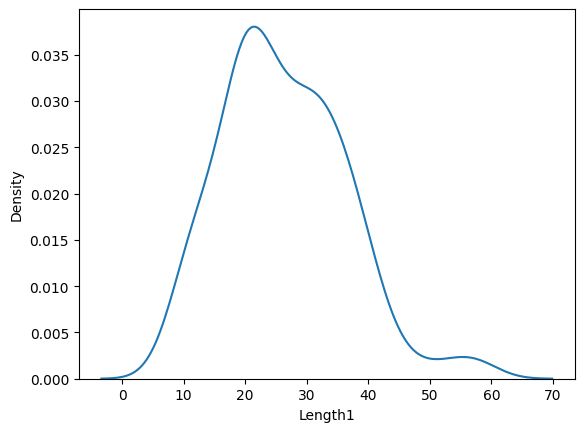

In [21]:
sns.kdeplot(fish_df['Length1'])

In [22]:
fish_df['Length1'].skew()

0.5884823308370954

### 3.Length2

In [23]:
fish_df['Length2']

0      25.4
1      26.3
2      26.5
3      29.0
4      29.0
       ... 
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length2, Length: 159, dtype: float64

<AxesSubplot: xlabel='Length2', ylabel='Density'>

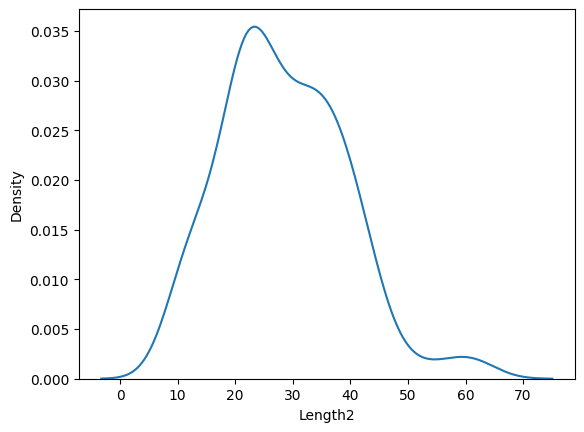

In [24]:
sns.kdeplot(fish_df['Length2'])

### 4.Length3

In [25]:
fish_df['Length3']

0      30.0
1      31.2
2      31.1
3      33.5
4      34.0
       ... 
154    13.4
155    13.5
156    13.8
157    15.2
158    16.2
Name: Length3, Length: 159, dtype: float64

<AxesSubplot: xlabel='Length3', ylabel='Density'>

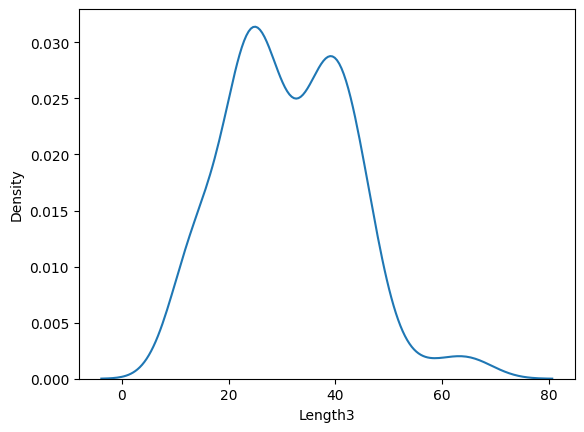

In [26]:
sns.kdeplot(fish_df['Length3'])

In [27]:
fish_df['Length3'].skew()

0.39154084789678356

### 5.Height

In [28]:
fish_df['Height']

0      11.5200
1      12.4800
2      12.3778
3      12.7300
4      12.4440
        ...   
154     2.0904
155     2.4300
156     2.2770
157     2.8728
158     2.9322
Name: Height, Length: 159, dtype: float64

<AxesSubplot: xlabel='Height', ylabel='Density'>

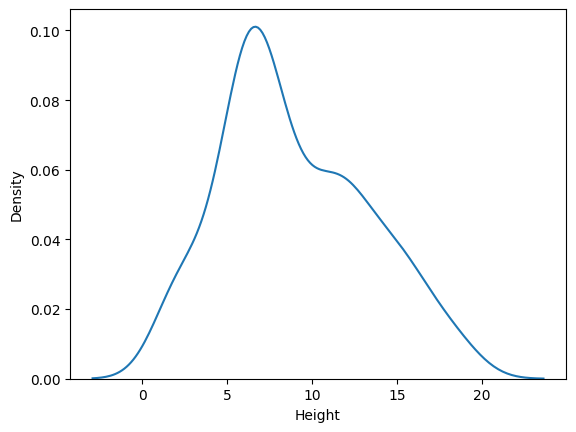

In [29]:
sns.kdeplot(fish_df['Height'])

### 6.Width 

In [30]:
fish_df['Width']

0      4.0200
1      4.3056
2      4.6961
3      4.4555
4      5.1340
        ...  
154    1.3936
155    1.2690
156    1.2558
157    2.0672
158    1.8792
Name: Width, Length: 159, dtype: float64

<AxesSubplot: xlabel='Width', ylabel='Density'>

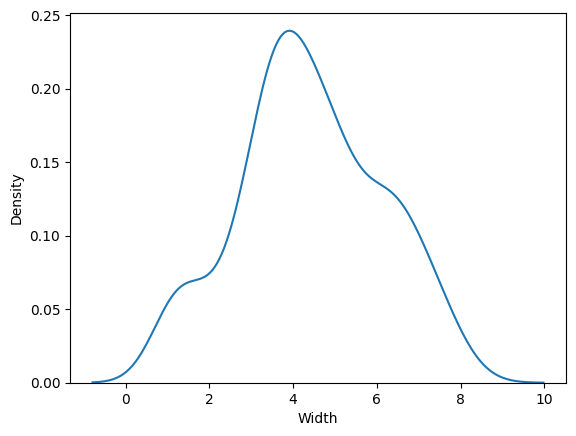

In [31]:
sns.kdeplot(fish_df['Width'])

### Target Columns

### Weight

In [32]:
fish_df['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

<AxesSubplot: xlabel='Weight', ylabel='Density'>

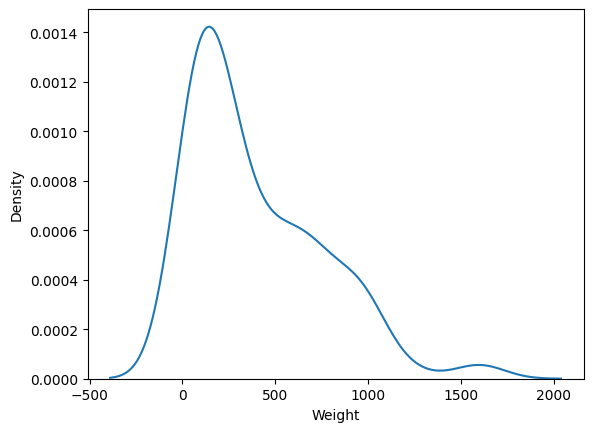

In [33]:
sns.kdeplot(fish_df['Weight'])

In [34]:
fish_df['Weight'].skew()

1.1044503929261893

In [35]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB


In [36]:
x = fish_df.drop(columns=['Weight'],axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.6 KB


In [37]:
y = fish_df['Weight']

#### Train_Test_Split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 109 to 117
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  127 non-null    int64  
 1   Length1  127 non-null    float64
 2   Length2  127 non-null    float64
 3   Length3  127 non-null    float64
 4   Height   127 non-null    float64
 5   Width    127 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.9 KB


In [40]:
linear_regression=LinearRegression()

In [7]:
def eval_metrics(actual, pred):
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return mse, rmse, mae, r2

### Model Training : 

In [41]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred_train = linear_regression.predict(x_train)

mse, rmse, mae, r2=eval_metrics(y_train, y_pred_train)
print("Mean Sqaure Error :",mse)
print("Root Mean Square Error :",rmse)
print("Mean Absolute Erro :",mae)
print("R-sqaured :",r2)

Mean Sqaure Error : 11252.156326902375
Root Mean Square Error : 106.07618171343827
Mean Absolute Erro : 82.26608930247889
R-sqaured : 0.899238599021062


### Moodel Testing :

In [42]:

y_pred_test = linear_regression.predict(x_test)

mse, rmse, mae, r2=eval_metrics(y_test, y_pred_test)
print("Mean Sqaure Error :",mse)
print("Root Mean Square Error :",rmse)
print("Mean Absolute Erro :",mae)
print("R-sqaured :",r2)

Mean Sqaure Error : 31239.799033644304
Root Mean Square Error : 176.74784025171087
Mean Absolute Erro : 121.60852979438289
R-sqaured : 0.828817220827448


### User input 

In [43]:

Species = 'Bream'
Length1 =  36
Length2 =40
Length3 = 39.0
Height =  11.00
Width = 6.003

Project_data = {'Species': {'Perch': 1,'Bream': 2,'Roach': 3,'Pike': 4,'Smelt': 5,'Parkki': 6,'Whitefish': 7},
                'Columns': x.columns.tolist()}


feature= np.zeros(len(x.columns))

feature[0]=Project_data['Species'][Species]
feature[1]=Length1
feature[2]=Length2
feature[3]=Length3
feature[4]=Height
feature[5] =Width

weight = linear_regression.predict([feature])
weight[0]

701.5146754730113

In [44]:
Project_data = {'Species': {'Perch': 1,'Bream': 2,'Roach': 3,'Pike': 4,'Smelt': 5,'Parkki': 6,'Whitefish': 7},
                'Columns': x.columns.tolist()}


In [45]:
a= 'Bream'
Project_data['Species'][a]

2

In [46]:
import pickle
import os
import json 
import pickle


In [50]:
with open('model.pkl','wb') as f:
    pickle.dump(linear_regression,f)

In [49]:
Project_data = {'Species': {'Perch': 1,'Bream': 2,'Roach': 3,'Pike': 4,'Smelt': 5,'Parkki': 6,'Whitefish': 7},
                'Columns': x.columns.tolist()}
with open('project_data.json','w') as f:
    json.dump(Project_data,f)

'D:\\Project_FIle\\Fish_project\\file_path\\Fish.csv'

In [62]:
import pickle,gzip
import numpy as np 
import json 
import config

class FishWeight():
    def __init__(self,user_data):
        
        self.user_data = user_data
        self.model_path =r'D:\Project_FIle\Fish_project\preprocessing\fish_model.pklz' 
        self.project_data_path =r'D:\Project_FIle\Fish_project\preprocessing\project_data.json'

    def load_data(self):

        with gzip.open(self.model_path,'rb') as f:
            self.model = pickle.load(f)

        with open(self.project_data_path,'r') as f:
            self.project_data = json.load(f)

    def get_fish_weight(self):
        self.load_data()

        Species = self.user_data['Species']

        feature= np.zeros(len(self.project_data['Columns']))

        feature[0]=self.project_data['Species'][Species]
        feature[1]=self.user_data['Length1']
        feature[2]=self.user_data['Length2']
        feature[3]=self.user_data['Length3']
        feature[4]=self.user_data['Height']
        feature[5]=self.user_data['Width']

        weight = self.model.predict([feature])[0]
        return weight


fish = FishWeight(user_data)
result=fish.get_fish_weight()
result

266.9367586222784

In [48]:
user_data = {'Species': 'Bream',
  'Length1': 23.2,
  'Length2': 25.4,
  'Length3': 30.0,
  'Height': 11.52,
  'Width': 4.02}
user_data

{'Species': 'Bream',
 'Length1': 23.2,
 'Length2': 25.4,
 'Length3': 30.0,
 'Height': 11.52,
 'Width': 4.02}

In [36]:
x.head(1).T.to_dict()

{0: {'Species': 2.0,
  'Length1': 23.2,
  'Length2': 25.4,
  'Length3': 30.0,
  'Height': 11.52,
  'Width': 4.02}}

In [ ]:
 {'Species': 2.0,
  'Length1': 23.2,
  'Length2': 25.4,
  'Length3': 30.0,
  'Height': 11.52,
  'Width': 4.02}